**<font size='6' color='red'>ch12.데이터프레임과 시리즈(Pandas) </font>**

# 1절. 판다스 패키지

- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임 제공
- 결측치처리, 크기변경(열삽입,열삭제,원하는 부분만 슬라이싱), 데이터분할하거나 병합 구조변경, <br>데이터 정렬, 파일입출력 등이 용이

- https://pypi.python.org/pypi/pandas(package index)
- https://pandas.pydata.org/pandas-docs/stable/api.html(API reference)

In [5]:
%ls data

 E 드라이브의 볼륨: 학생방
 볼륨 일련 번호: 7E59-335E

 E:\금경용\src\08_python\data 디렉터리

2021-03-03  오후 02:54    <DIR>          .
2021-03-03  오후 02:54    <DIR>          ..
2021-03-03  오전 09:58    <DIR>          .ipynb_checkpoints
2021-02-26  오후 03:02                38 ch08_abc.txt
2021-03-02  오후 05:57                 0 ch09_customers.txt
2021-03-02  오후 01:19           292,544 ch09_iris.hdf5
2021-03-02  오후 02:48         1,069,192 ch09_iris2.hdf5
2021-02-26  오후 06:20               227 ch09_member.data
2021-02-26  오후 06:05               112 ch09_member.txt
2021-03-02  오전 10:09               163 ch09_member1.csv
2021-03-02  오후 02:33               151 ch09_member1.json
2021-03-02  오전 11:05                97 ch09_member1-1.csv
2021-03-02  오전 10:17                70 ch09_member2.csv
2021-03-02  오후 12:36               298 ch09_member2.json
2021-03-02  오전 10:21                70 ch09_member2-1.csv
2021-03-02  오전 11:21               137 ch09_member3.csv
2021-03-02  오전 11:59               139 ch09_member4.csv
202

In [11]:
import pandas as pd
data = pd.read_json('data/ch09_member2.json',encoding='utf-8')
data

,name,age,email,address
0,홍길동,20,hong@hong.com,서울
1,김길동,30,kim@hong.com,파주
2,윤길동,40,yun@hong.com,인천


In [7]:
type(data)

# 2절. 데이터 프레임 만들기

## 2.1 딕셔너리를 이용해서 데이터 프레임 만들기

In [13]:
import pandas as pd
d= {'col1':[1,2],'col2':[3,4]}
df=pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [15]:
d=[{'col1':1,'col2':3},{'col1':2,'col2':4}]
df=pd.DataFrame(data=d)
df

,col1,col2
0,1,3
1,2,4


In [16]:
d=[{'col1':1,'col2':3},{'col1':2,'col2':4},{'col':9}]
df=pd.DataFrame(data=d)
df

,col1,col2,col
0,1.0,3.0,NaN
1,2.0,4.0,NaN
2,NaN,NaN,9.0


## 2.2리스트를 이용해 데이터 프레임 만들기

In [18]:
kor=[100,95,94,92,90]
math=[90,95,82,73,60]
df=pd.DataFrame({'kor':kor,'math':math})
df

,kor,math
0,100,90
1,95,95
2,94,82
3,92,73
4,90,60


In [27]:
import numpy as np
df=pd.DataFrame(np.c_[kor,math],columns=['kor','math'])
df

,kor,math
0,100,90
1,95,95
2,94,82
3,92,73
4,90,60


In [25]:
np.c_[[kor],[math]]

array([[100,  95,  94,  92,  90,  90,  95,  82,  73,  60]])

In [26]:
pd.DataFrame(np.c_[[kor],[math]],
            columns=['score1','score2','score3','score4','score5','score6','score7','score8','score9','score10'])

,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,100,95,94,92,90,90,95,82,73,60


## 2.3 read_csv()

In [31]:
df=pd.read_csv("E:\금경용\data/상가업소정보_201912_01.csv",sep='|',encoding='utf-8')
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [32]:
pd.options.display.max_columns # 최대로 출력될 수 있는 컬럼수

20

In [34]:
pd.options.display.max_columns = 39 #최대 39열까지 출력 가능
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1168010600206040000,1,대지,604,NaN,서울특별시 강남구 대치동 604,116802000003,서울특별시 강남구 남부순환로,2933,NaN,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [38]:
# (1) CSV파일로 읽어 오기 
member_df = pd.read_csv('data/ch12_member_data.csv',sep=',',encoding='UTF-8',comment='#')#comment='이거'이거는 읽지마
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [41]:
type(member_df) #2차원 : DataFrame 로 가지고옴

pandas.core.frame.DataFrame

In [42]:
type(member_df['Name']) #1차원 : Series 로 가지고옴

pandas.core.series.Series

In [48]:
# 3) 행 제외해서 읽어오기
member_df = pd.read_csv('data/ch12_member_data.csv',comment='#',skiprows=[1,3]) #shiprows 스킵하고 싶은 행 지정,0행이 header
member_df

,Name,Age,Email,Address
0,홍길서,25,kilseo@hong.com,서울시 강서구
1,홍길북,30,north@hong.com,서울시 강북구


## 2.4 sklearn.datasets 모듈 데이터를 데이터 프레임으로 변환하기
- sklearn 패키지에는 학습을 위한 많은 데이터셋 제공. 딕셔너리 형태로 제공 

In [49]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [52]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [55]:
iris["feature_names"] #독립변수의 columns 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
iris["data"] # 독립변수
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [57]:
iris["target"]#원핫인코딩이 된 종속변수
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
iris['target_names']
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
# 사람이 알아보기 쉬운 원핫인코딩 안된 종속변수
iris.target_names[iris.target]
iris['target_names'][iris['target']]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [78]:
x = pd.DataFrame(iris.data,columns=iris.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [76]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [77]:
x.columns=['sepal_length ','sepal_width','petal_length','petal_width']
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [86]:
x.columns=[col[0:12].strip().replace(' ','_') for col in x.columns]
x #독립변수

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [88]:
y= pd.DataFrame(iris.target_names[iris.target],columns=['species'])#colunms에는 반드시 리스트
y#종속변수

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [92]:
iris = pd.concat([x,y],axis=1)#열병합 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [99]:
iris.head(-145)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [100]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 3절. 이름지정하기(열,행)

## 3.1 열이름 지정하기

In [102]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [108]:
member_df.columns=['이름','나이','이메일','주소']
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


## 3.2 행이름 지정하기

In [109]:
member_df.index = ['동','서','남','북']
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [111]:
member_df.loc[['동','남'],'이름']

동    홍길동
남    홍길남
Name: 이름, dtype: object

## 3.3 레벨이름 지정하기

In [115]:
member_df.columns=[['기본정보','기본정보','추가정보','추가정보'],
                  ['이름','나이','이메일','주소']]
member_df.columns.names=['대분류','소분류']
member_df

대분류  기본정보                  추가정보          
소분류    이름  나이               이메일        주소
좌우 동  홍길동  20  kildong@hong.com   서울시 강동구
   서  홍길서  25   kilseo@hong.com   서울시 강서구
상하 남  홍길남  26    south@hong.com  서울시 강남구 
   북  홍길북  30    north@hong.com  서울시 강북구

In [113]:
member_df.index=[['좌우','좌우','상하','상하'],
                ['동','서','남','북']]
member_df

대분류  기본정보 기본정도              추가정보          
소분류    이름   나이               이메일        주소
좌우 동  홍길동   20  kildong@hong.com   서울시 강동구
   서  홍길서   25   kilseo@hong.com   서울시 강서구
상하 남  홍길남   26    south@hong.com  서울시 강남구 
   북  홍길북   30    north@hong.com  서울시 강북구

In [121]:
# columns 나 index가 레벨을 두면 부분 데이터 조회가 불편
member_df.loc['상하','기본정보']['이름']['남']

'홍길남'

# 4절. 부분 데이터 조회
- 단일열만 조회,loc,iloc

In [131]:
#member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df.columns=['이름','나이','이메일','주소']
member_df.index=range(member_df.shape[0])
member_df

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [132]:
member_df.shape

(4, 4)

## 4.1단일열 조회

In [133]:
member_df.이름

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

In [134]:
member_df['이름']

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

In [148]:
member_df.head()

,이름,나이,이메일,주소
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [137]:
#데이터 프레임을 읽고 데이터프레임
member_df.shape

(4, 4)

In [138]:
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      4 non-null      object
 1   나이      4 non-null      int64 
 2   이메일     4 non-null      object
 3   주소      4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [140]:
pd.to_numeric(member_df['나이'],errors='coerce')#만약 Dtype 나이에 object가 되어있을 경우
                                        #문자인 '나이'필드를 숫자로 바꾸고 에러는 무시 

0    20
1    25
2    26
3    30
Name: 나이, dtype: int64

In [141]:
member_df.isnull()#결측치 확인

,이름,나이,이메일,주소
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [143]:
print(False==0,True==1)
print(False+False+False+True)

True True
1


In [145]:
member_df.isnull().sum() #열별 격측치 수

이름     0
나이     0
이메일    0
주소     0
dtype: int64

In [146]:
member_df.isna()# 결측리면 True, 결측치가 아니면 False 

,이름,나이,이메일,주소
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False


In [147]:
member_df.isna().sum()#열별 결측치 수 

이름     0
나이     0
이메일    0
주소     0
dtype: int64

In [151]:
type(member_df['이름']) #데이터프레임에서 단일열을 시리즈

pandas.core.series.Series

In [152]:
member_df['이름'] 

0    홍길동
1    홍길서
2    홍길남
3    홍길북
Name: 이름, dtype: object

## 4.2 loc을 이용한 조회(columns,index로 조회,조건)

In [153]:
member_df.index=['동','서','남','북']
member_df

,이름,나이,이메일,주소
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [157]:
member_df.loc[:,'이름':'이메일'] #모든행의 이름, 나이, 이메일

,이름,나이,이메일
동,홍길동,20,kildong@hong.com
서,홍길서,25,kilseo@hong.com
남,홍길남,26,south@hong.com
북,홍길북,30,north@hong.com


In [159]:
member_df.loc[:,['이름','이메일']] #모든행의 이름, 이메일

,이름,이메일
동,홍길동,kildong@hong.com
서,홍길서,kilseo@hong.com
남,홍길남,south@hong.com
북,홍길북,north@hong.com


In [163]:
member_df.loc['동':'남',['이름','주소']] #동~ 남 행까지(남포함)

,이름,주소
동,홍길동,서울시 강동구
서,홍길서,서울시 강서구
남,홍길남,서울시 강남구


In [164]:
member_df.loc["동":"남","이름":"이메일"]

,이름,나이,이메일
동,홍길동,20,kildong@hong.com
서,홍길서,25,kilseo@hong.com
남,홍길남,26,south@hong.com


In [166]:
# loc안에는 columns 이름(열), index이름(행) ,조건 
member_df.loc[member_df.나이>25]

,이름,나이,이메일,주소
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


## 4.3 iloc을 이용한 조회(정수로 조회)

In [168]:
#iloc[from,to,by]는 정수를 이용해서 데이터 셋 조회
#from 부터 by씩 증감해서 to 전까지(to미포함)
#from, to, by는 음수 가능. 음수 인덱스번호는 뒤부터.

In [169]:
member_df.iloc[1:3,1:3] #데이터 프레임

,나이,이메일
서,25,kilseo@hong.com
남,26,south@hong.com


In [171]:
member_df.iloc[1,1:3] #시리즈 타입

나이                  25
이메일    kilseo@hong.com
Name: 서, dtype: object

In [172]:
member_df.iloc[2] #열인덱스번호가 생략되면 전체 열을 의미

이름                홍길남
나이                 26
이메일    south@hong.com
주소           서울시 강남구 
Name: 남, dtype: object

In [175]:
member_df.iloc[-1]

이름                홍길북
나이                 30
이메일    north@hong.com
주소           서울시 강북구 
Name: 북, dtype: object

In [176]:
member_df.iloc[::-1,::-1] #열괴 행을 거꾸로 

,주소,이메일,나이,이름
북,서울시 강북구,north@hong.com,30,홍길북
남,서울시 강남구,south@hong.com,26,홍길남
서,서울시 강서구,kilseo@hong.com,25,홍길서
동,서울시 강동구,kildong@hong.com,20,홍길동


In [177]:
member_df.iloc[[0,3],[0,1,3]]

,이름,나이,주소
동,홍길동,20,서울시 강동구
북,홍길북,30,서울시 강북구


## 4.4 조건으로 조회하기

In [183]:
# iris 데이터 가져오는 방법1
from sklearn import datasets
iris=datasets.load_iris() #딕셔너리 형태
x=pd.DataFrame(iris.data,columns=iris.feature_names) # iris.data=iris["data"]
y=pd.DataFrame(iris.target_names[iris.target],columns=['species'])
iris_df=pd.concat([x,y],axis=1) #열로붙여라
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [184]:
#iris 데이터 가져오는 방법 2
import seaborn as sns
iris_df=sns.load_dataset("iris")
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [189]:
# iris 데이터 가져오기 방법3
# statsmodels 패키지를 통해 R데이터 셋 가져오기
# get_rdataset()함수로 R패키지 데이터 셋을 가져옴
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris",package="datasets")
iris_df=iris.data #담겨있는 데이터를 데이터프레임 형태로
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [192]:
iris_df.iloc[0:5,:-1]#독립변수 top 5행만 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [195]:
iris_df.iloc[:,-1]#종속변수만

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [196]:
print(member_df.이름)
print(member_df['이름'])

동    홍길동
서    홍길서
남    홍길남
북    홍길북
Name: 이름, dtype: object
동    홍길동
서    홍길서
남    홍길남
북    홍길북
Name: 이름, dtype: object


In [197]:
iris_df.loc[iris_df.Species=='virginica'].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [198]:
iris_df.loc[iris_df["Species"]=='virginica'].head() #종이 virginica 행의 모든열

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [203]:
iris_df.loc[iris_df["Species"]=='virginica',
           ['Sepal.Length','Sepal.Width','Species']].head()#종이 virginica 행의 특정열

,Sepal.Length,Sepal.Width,Species
100,6.3,3.3,virginica
101,5.8,2.7,virginica
102,7.1,3.0,virginica
103,6.3,2.9,virginica
104,6.5,3.0,virginica


In [ ]:
#종이 virginica이고  Sepal.Length가 6.4이상인 데이터만 모든 열 조회

In [209]:
iris_df.loc[(iris_df.Species=='virginica')&
           (iris_df['Sepal.Length']>=7.0)]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


In [207]:
#iris_df.Sepal.Length #불가능 .때문에 s 와 L사이의 .떄문에
iris_df["Sepal.Length"] #가능

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

# 5절. 데이터 추가 및 삭제

## 5.1 데이터 프레임 요소 삭제

In [210]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


**1)단일행 삭제하기**

In [219]:
member_df2=member_df.drop(3,axis=0)#axis=0 생략가능,행에서 찾아 삭제된 데이터셋 반환.
                        #member_df에서 삭제되지 않음
member_df2

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구


In [220]:
member_df2.drop(3)# 없는 행 삭제하려면 에러

KeyError: '[3] not found in axis'

In [222]:
member_df.drop(2,inplace=False)#inplace=True이면 값을 반환하지 않고 member_df 데이터셋에서 drop

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
3,홍길북,30,north@hong.com,서울시 강북구


In [224]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df.index=['동','서','남','북']
member_df

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [227]:
#axis=0이면 '북'은 indxe. 해당index의 행을 삭제한 데이터를 반환
member_df.drop('북',axis=0)

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


In [ ]:
#axis=0이면 '북'은 indxe. 해당index의 행을 삭제한 데이터를 member_df에 반영되려면
member_df.drop('북',inplace=True)

**<2)단일 열 삭제하기<&&

In [228]:
member_df

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [231]:
member_df.drop('Email',axis=1)#axis= 1 해당열을 삭제한 데이터셋을 반환

,Name,Age,Address
동,홍길동,20,서울시 강동구
서,홍길서,25,서울시 강서구
남,홍길남,26,서울시 강남구
북,홍길북,30,서울시 강북구


In [230]:
#위의 DROP함수의 결과가 member)df에도 반영되게 하려면 inplace-True 추가
member_df_drop('Email',axis=1,inplace=True)

,Name,Age,Email,Address
동,홍길동,20,kildong@hong.com,서울시 강동구
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구
북,홍길북,30,north@hong.com,서울시 강북구


In [232]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df.index=['동','서','남','북']

## 여러 행이나 열을 삭제

In [234]:
member_df = member_df.drop(labels=['동','북'])
member_df

,Name,Age,Email,Address
서,홍길서,25,kilseo@hong.com,서울시 강서구
남,홍길남,26,south@hong.com,서울시 강남구


In [235]:
member_df.drop(labels=['Age','Email','Address'],axis=1)

,Name
서,홍길서
남,홍길남


## 5.2 데이터프레임의 요소 추가

**1) 열추가**

In [236]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [238]:
member_df['BirthYear']=2021-member_df['Age']+1#자주사용~!
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2002
1,홍길서,25,kilseo@hong.com,서울시 강서구,1997
2,홍길남,26,south@hong.com,서울시 강남구,1996
3,홍길북,30,north@hong.com,서울시 강북구,1992


In [240]:
member_df['BirthYear']=2000
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2000
1,홍길서,25,kilseo@hong.com,서울시 강서구,2000
2,홍길남,26,south@hong.com,서울시 강남구,2000
3,홍길북,30,north@hong.com,서울시 강북구,2000


In [241]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df


,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [247]:
member_df['BirthYear']=[2000]*len(member_df) 
#member_df['BirthYear']=2000 #모든행에 2000
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2000
1,홍길서,25,kilseo@hong.com,서울시 강서구,2000
2,홍길남,26,south@hong.com,서울시 강남구,2000
3,홍길북,30,north@hong.com,서울시 강북구,2000


In [248]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df['BirthYear']=[2001,1993,1995,1990]
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001
1,홍길서,25,kilseo@hong.com,서울시 강서구,1993
2,홍길남,26,south@hong.com,서울시 강남구,1995
3,홍길북,30,north@hong.com,서울시 강북구,1990


In [249]:
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df['BirthYear']=[2001,1993,1995,None]#타입이 모두 통일화 되어야함 None or 실수를 넣으면 타입은 float 

member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,1993.0
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,NaN


In [252]:
import numpy as np
np.nan     #type(np.nan) 타입dl float가 나옴

nan

In [260]:
import pandas as pd 
pd.np.nan

<ipython-input-260-4812e9263031>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.nan


nan

In [261]:
type(np.nan)

float

In [262]:
#시리즈 데이터를 이용한 열 추가

** 2>행 추가 **

In [263]:
pd.Series([2001,1995,1996],index=[0,2,3])

0    2001
2    1995
3    1996
dtype: int64

In [266]:
member_df['BirthYear']=pd.Series([2001,1995,1996],index=[0,2,3])
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN


In [253]:
#행추가 방법1. 시리즈를 이용한 행추가 
member_df=pd.read_csv('data/ch12_member_data.csv',comment='#')
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구


In [255]:
new_member=pd.Series(['홍길중',28,'middle@hong.com','서울시 중구'],index=member_df.columns)
new_member

Name                   홍길중
Age                     28
Email      middle@hong.com
Address             서울시 중구
dtype: object

In [257]:
member_df = member_df.append(new_member,ignore_index=True) #member_df에도 반영 return만 되고 반환되지는 않아서 꼭 할당을 해줘야함!

In [258]:
member_df

,Name,Age,Email,Address
0,홍길동,20,kildong@hong.com,서울시 강동구
1,홍길서,25,kilseo@hong.com,서울시 강서구
2,홍길남,26,south@hong.com,서울시 강남구
3,홍길북,30,north@hong.com,서울시 강북구
4,홍길중,28,middle@hong.com,서울시 중구


In [259]:
member_df.columns

Index(['Name', 'Age', 'Email', 'Address'], dtype='object')

In [267]:
#행추가 방법2. 딕셔너리를 이용한 행 추가

In [268]:
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN


In [271]:
new_member={'Name':'김길북','Age':30,'Email':'kil@hong.com','Address':'서울시 서대문구','BirthYear':1991}
member_df.append(new_member,ignore_index=True)#append에 dataFrame이 들어가야함 #member_df에 반영은 안 함

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길북,30,kil@hong.com,서울시 서대문구,1991.0


In [272]:
member_df=member_df.append(new_member,ignore_index=True)
member_df

,Name,Age,Email,Address,BirthYear
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0
3,홍길북,30,north@hong.com,서울시 강북구,1996.0
4,홍길중,28,middle@hong.com,서울시 중구,NaN
5,김길북,30,kil@hong.com,서울시 서대문구,1991.0


In [273]:
#행추가 방법3. 딕셔너리를 이용한 행 추가(여러 행을 한번에 추가)
new_member=pd.DataFrame({'Name':['이순신'],
                        'Age':[31],
                        'Eamil':['lee@hong.com'],
                        'Address':['경기도 안양시'],
                        'BirthYear':[1991]})
new_member

,Name,Age,Eamil,Address,BirthYear
0,이순신,31,lee@hong.com,경기도 안양시,1991


In [274]:
new_df=member_df.append(new_member)

In [275]:
new_df #이렇게 하게되면 index 0이 중복이 됨!

,Name,Age,Email,Address,BirthYear,Eamil
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0,NaN
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0,NaN
3,홍길북,30,north@hong.com,서울시 강북구,1996.0,NaN
4,홍길중,28,middle@hong.com,서울시 중구,NaN,NaN
5,김길북,30,kil@hong.com,서울시 서대문구,1991.0,NaN
0,이순신,31,NaN,경기도 안양시,1991.0,lee@hong.com


In [277]:
len(new_df)

7

In [276]:
#range(7):0~6
new_df.index=range(len(new_df)) #데이터프레임을 통해서 추가할 경우 index다시 재조정
new_df

,Name,Age,Email,Address,BirthYear,Eamil
0,홍길동,20,kildong@hong.com,서울시 강동구,2001.0,NaN
1,홍길서,25,kilseo@hong.com,서울시 강서구,NaN,NaN
2,홍길남,26,south@hong.com,서울시 강남구,1995.0,NaN
3,홍길북,30,north@hong.com,서울시 강북구,1996.0,NaN
4,홍길중,28,middle@hong.com,서울시 중구,NaN,NaN
5,김길북,30,kil@hong.com,서울시 서대문구,1991.0,NaN
6,이순신,31,NaN,경기도 안양시,1991.0,lee@hong.com


# 6절. 정렬

## 6.1 행이름(index)으로 정렬

In [287]:
member_df

,Address,Age,BirthYear,Email,Name
남,서울시 강남구,26,1995.0,south@hong.com,홍길남
동,서울시 강동구,20,2001.0,kildong@hong.com,홍길동
북,서울시 강북구,30,1996.0,north@hong.com,홍길북
서,서울시 강서구,25,NaN,kilseo@hong.com,홍길서
안,서울시 중구,28,NaN,middle@hong.com,홍길중
중,서울시 서대문구,30,1991.0,kil@hong.com,김길북


In [279]:
member_df.index=['동','서','남','북','안','중']
member_df

,Name,Age,Email,Address,BirthYear
동,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
남,홍길남,26,south@hong.com,서울시 강남구,1995.0
북,홍길북,30,north@hong.com,서울시 강북구,1996.0
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길북,30,kil@hong.com,서울시 서대문구,1991.0


In [284]:
member_df.sort_index()# index를 정렬 (한글일 경우 ㄱㄴㄷ순) 정렬된 데이터를 반환할 뿐 member_df에는 반영되지 않음
member_df.sort_index(inplace=True,axis=0)#반환은 되지 않지만 member_df에 반영되었음
member_df

,Name,Age,Email,Address,BirthYear
남,홍길남,26,south@hong.com,서울시 강남구,1995.0
동,홍길동,20,kildong@hong.com,서울시 강동구,2001.0
북,홍길북,30,north@hong.com,서울시 강북구,1996.0
서,홍길서,25,kilseo@hong.com,서울시 강서구,NaN
안,홍길중,28,middle@hong.com,서울시 중구,NaN
중,김길북,30,kil@hong.com,서울시 서대문구,1991.0


## 6.2 열이름(columns)로 정렬

In [286]:
member_df.sort_index(inplace=True,axis=1)#axis=0일 경우 행 ,axis=1일 경우 열
member_df

,Address,Age,BirthYear,Email,Name
남,서울시 강남구,26,1995.0,south@hong.com,홍길남
동,서울시 강동구,20,2001.0,kildong@hong.com,홍길동
북,서울시 강북구,30,1996.0,north@hong.com,홍길북
서,서울시 강서구,25,NaN,kilseo@hong.com,홍길서
안,서울시 중구,28,NaN,middle@hong.com,홍길중
중,서울시 서대문구,30,1991.0,kil@hong.com,김길북


## 6.3 값으로 정렬

In [290]:
member_df.sort_values(by=['Name'],inplace=True)

In [296]:
new_series=pd.Series(['서울시 마포구',26,1996,'k@hong.com','김길북'],
                    index=member_df.columns)
new_series

Address         서울시 마포구
Age                  26
BirthYear          1996
Email        k@hong.com
Name                김길북
dtype: object

In [297]:
member_df=member_df.append(new_series,ignore_index=True,)

In [298]:
member_df

,Address,Age,BirthYear,Email,Name
0,서울시 서대문구,30,1991.0,kil@hong.com,김길북
1,서울시 강남구,26,1995.0,south@hong.com,홍길남
2,서울시 강동구,20,2001.0,kildong@hong.com,홍길동
3,서울시 강북구,30,1996.0,north@hong.com,홍길북
4,서울시 강서구,25,NaN,kilseo@hong.com,홍길서
5,서울시 중구,28,NaN,middle@hong.com,홍길중
6,서울시 마포구,26,1996.0,k@hong.com,김길불
7,서울시 마포구,26,1996.0,k@hong.com,김길북


In [307]:
member_df.sort_values(by=['Name','Age','Email'],inplace=True)#ascending=False일경우 내림차순으로 정렬
member_df

pandas.core.frame.DataFrame

# 7절. 기초 통계 분석 
- count: 결측치(NaN)를 제외한 갯수
- min: 최소값
- max: 최대값
- sum: 합
- cumprod: 누적합
- mean: 평균
- median: 중앙값
- quantile: 분위수
- corr: 상관관계
- var: 표준편차
- std: 분산(=표준편차표준편차)
- desribe : 요약 통계량

In [303]:
#R패키지 가지고오기
import statsmodels.api as sm
iris_df = sm.datasets.get_rdataset("iris",package='datasets').data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [304]:
type(iris_df)

pandas.core.frame.DataFrame

In [305]:
iris_df.shape

(150, 5)

## 7.1 최솟값, 최대값 ,평균 ,중위수

In [318]:
iris_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [309]:
iris_df.min()#axis=0 열별 최소값

Sepal.Length       4.3
Sepal.Width          2
Petal.Length         1
Petal.Width        0.1
Species         setosa
dtype: object

In [311]:
iris_df.min(axis=1)#axis=1 행별 최소값

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Length: 150, dtype: float64

In [313]:
iris_df.max()#열별 최대값

Sepal.Length          7.9
Sepal.Width           4.4
Petal.Length          6.9
Petal.Width           2.5
Species         virginica
dtype: object

In [314]:
iris_df.mean()#열별 평균

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [315]:
iris_df.median()#열별 중앙값

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [316]:
iris_df.std()#열별 표준편차

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [317]:
# 열별 사분위수
iris_df.quantile(q=[0,0,0.25,0.5,0.75,1.0],interpolation='nearest')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.0,0.1
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [319]:
iris_df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [321]:
iris_df.loc[:,'Sepal.Length':'Petal.Width']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [326]:
#iris_df.iloc[:,:-1].describe()
iris_df.describe()#describe은 기본적으로 숫자 데이터만 요약통계 출력

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [327]:
#문자 또는 타임스탬프 자료의 요약 통계:unique(자료의 가지수),top(제일 많이 나오는 자료),freq(top이 몇번 나오는지)
iris_df.iloc[:,-1].describe()

count            150
unique             3
top       versicolor
freq              50
Name: Species, dtype: object

In [330]:
#include와 exclue의 사용 예
df=pd.DataFrame({'a':[1,2]*3,
                'b':[True,False]*3,
                'c':[2.0,4]*3})
df

,a,b,c
0,1,True,2.0
1,2,False,4.0
2,1,True,2.0
3,2,False,4.0
4,1,True,2.0
5,2,False,4.0


In [336]:
df.describe()#요약통계량 출력시 bool타입은 제외
df.iloc[:,1].describe()

count        6
unique       2
top       True
freq         3
Name: b, dtype: object

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      bool   
 2   c       6 non-null      float64
dtypes: bool(1), float64(1), int64(1)
memory usage: 230.0 bytes


In [338]:
#include 및 exclude 매개 변수를 사용하여 분석되는 열을 추가하거나 제외시킬 수 있다.
df.describe(include=['int64','bool'])

,a,b
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [339]:
df.describe(include=['int64'])

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [341]:
df.describe(exclude=['bool','float64'])#exclude 분석열에서 제외할 타입

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [342]:
df.describe(include=['int64'],exclude=['bool','float64'])

,a
count,6.000000
mean,1.500000
std,0.547723
min,1.000000
25%,1.000000
50%,1.500000
75%,2.000000
max,2.000000


In [344]:
#include 와 exclude에 같은 유형이 사용되면 오류 발생
df.describe(include=['int64'],exclude=['int64','float64'])

ValueError: include and exclude overlap on frozenset({<class 'numpy.int64'>})

In [347]:
var=iris_df.var()#분산
var

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [348]:
import numpy as np
np.sqrt(var)

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [349]:
iris_df.std()

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

## 7.3 공분산, 상관계수 

In [350]:
# https://destrudo.tistory.com/15
# 공분산 Cov(x,y)=E((x-x의 평균)(y=y의 평균))
#분산 Var(x)=E((x-x의 편균)의 제곱)
iris_df.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [351]:
# 상관계수 -1<=Rㄱ <=1
iris_df.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:xlabel='Petal.Length', ylabel='Petal.Width'>

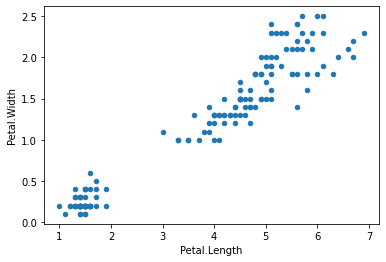

In [354]:
iris_df.plot(x="Petal.Length",y="Petal.Width",kind="scatter")

<AxesSubplot:xlabel='Petal.Width', ylabel='Petal.Length'>

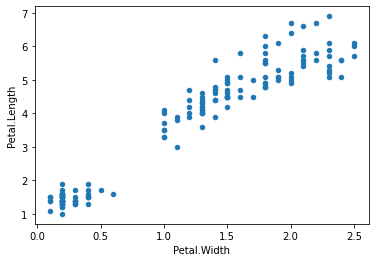

In [355]:
iris_df.plot(x="Petal.Width",y="Petal.Length",kind="scatter")